## Business Requirement

###### To design analytics for Contact Centre Sentiment Analysis to improve customer experience

## Data Preparation

##### The data source is TESS Toronto emotional speech set data - state the qualities and features

#### Import Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

### Get files from Datasource into a Dataframe

In [4]:
directory = r'C:\Users\sarah\LHL-Data-Notes\Final Project\TESS Toronto emotional speech set data'
paths = []
emotions = []

for root, dirs, files in os.walk(directory):
    for filename in files:
        file_path = os.path.join(root, filename)
        paths.append(file_path)
        
        emotion = os.path.splitext(filename)[0].split('_')[-1].lower()
        emotions.append(emotion)

print('Dataset is Loaded')
print(emotions[:5])
print(paths[:5])
df=pd.DataFrame()
df['Speech']=paths
df['Emotions']=emotions
df.head()

Dataset is Loaded
['angry', 'angry', 'angry', 'angry', 'angry']
['C:\\Users\\sarah\\LHL-Data-Notes\\Final Project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav', 'C:\\Users\\sarah\\LHL-Data-Notes\\Final Project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav', 'C:\\Users\\sarah\\LHL-Data-Notes\\Final Project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav', 'C:\\Users\\sarah\\LHL-Data-Notes\\Final Project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav', 'C:\\Users\\sarah\\LHL-Data-Notes\\Final Project\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']


,Speech,Emotions
0,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry
1,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry
2,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry
3,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry
4,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry


In [5]:
df['Emotions'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: Emotions, dtype: int64

##  Feature Extraction

In [6]:

# Define functions to extract features
def zcr(audio, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(audio, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(audio, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=audio, sr=sr)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

# Extract features and append to DataFrame
zcr_features = []
rmse_features = []
mfcc_features = []

for file_path in df['Speech']:
    audio, sr = librosa.load(file_path, sr=None)
    
    zcr_val = zcr(audio)
    rmse_val = rmse(audio)
    mfcc_val = mfcc(audio, sr)
    
    zcr_features.append(zcr_val)
    rmse_features.append(rmse_val)
    mfcc_features.append(mfcc_val)
    
# Append features to DataFrame
df['ZCR'] = zcr_features
df['RMSE'] = rmse_features
df['MFCC'] = mfcc_features

In [7]:
df.head()

,Speech,Emotions,ZCR,RMSE,MFCC
0,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,"[0.00244140625, 0.08447265625, 0.19384765625, ...","[0.0010797889, 0.0020301517, 0.0035413173, 0.0...","[-616.80695, 12.440691, 12.140997, 11.67842, 1..."
1,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,"[0.0322265625, 0.04931640625, 0.09228515625, 0...","[0.000758889, 0.0014762853, 0.0026979514, 0.00...","[-683.4202, 19.036978, 18.51736, 17.748432, 16..."
2,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,"[0.021484375, 0.08935546875, 0.2021484375, 0.3...","[0.0013449743, 0.0017008522, 0.0028185642, 0.0...","[-627.9971, 11.215839, 11.175417, 11.108374, 1..."
3,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,"[0.06396484375, 0.14599609375, 0.26025390625, ...","[0.0007689179, 0.0017269918, 0.0033644084, 0.0...","[-603.11456, 9.558368, 9.529776, 9.482293, 9.4..."
4,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,"[0.02294921875, 0.08935546875, 0.19091796875, ...","[0.0021798855, 0.003609529, 0.0045751096, 0.00...","[-593.7115, -9.030716, 4.594999, 36.02922, -15..."


In [9]:
import tensorflow as tf
import torch

# Convert NumPy arrays to tensors
df['ZCR'] = df['ZCR'].apply(lambda x: torch.tensor(x))
df['RMSE'] = df['RMSE'].apply(lambda x: torch.tensor(x))
df['MFCC'] = df['MFCC'].apply(lambda x: torch.tensor(x))

# Expand tensors into individual columns
df = pd.concat([df.drop(['ZCR', 'RMSE', 'MFCC'], axis=1),
                df['ZCR'].apply(pd.Series).add_prefix('ZCR_'),
                df['RMSE'].apply(pd.Series).add_prefix('RMSE_'),
                df['MFCC'].apply(pd.Series).add_prefix('MFCC_')], axis=1)


In [10]:
df.head()

,Speech,Emotions,ZCR_0,ZCR_1,ZCR_2,ZCR_3,ZCR_4,ZCR_5,ZCR_6,ZCR_7,...,MFCC_5670,MFCC_5671,MFCC_5672,MFCC_5673,MFCC_5674,MFCC_5675,MFCC_5676,MFCC_5677,MFCC_5678,MFCC_5679
0,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,0.002441,0.084473,0.193848,0.310547,0.422363,0.463379,0.471191,0.382812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,0.032227,0.049316,0.092285,0.206543,0.292480,0.385254,0.413574,0.416504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,0.021484,0.089355,0.202148,0.323242,0.435059,0.492676,0.516602,0.468750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,0.063965,0.145996,0.260254,0.387695,0.445312,0.484863,0.498047,0.407715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:\Users\sarah\LHL-Data-Notes\Final Project\TE...,angry,0.022949,0.089355,0.190918,0.309082,0.425293,0.487793,0.412598,0.295410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Getting the shape of the model

In [11]:
# Fill NaN with 0
df = df.fillna(0)

# Define the prefixes
prefixes = ['ZCR', 'RMSE', 'MFCC']

# Initialize a dictionary to store the counts
column_counts = {}

# Count the columns starting with each prefix
for prefix in prefixes:
    prefix_columns = [col for col in df.columns if col.startswith(prefix)]
    column_counts[prefix] = len(prefix_columns)

# Print the counts
for prefix, count in column_counts.items():
    print(f"Number of columns starting with '{prefix}': {count}")


Number of columns starting with 'ZCR': 284
Number of columns starting with 'RMSE': 284
Number of columns starting with 'MFCC': 5680


In [12]:
df.shape

(2800, 6250)

## Define the Features(X-inputs) and the Labels(y-output)

In [16]:
X = df.drop(['Speech','Emotions'], axis=1)
y = df["Emotions"]

#### Performs label encoding and one-hot encoding on the target variable Y using LabelEncoder and to_categorical functions, respectively.

In [20]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Create an instance of LabelEncoder
lb = LabelEncoder()

# Encode the target variable y
encoded_y = lb.fit_transform(y)

# Apply one-hot encoding to the encoded target variable
one_hot_y = to_categorical(encoded_y)
y = one_hot_y

# Print the classes or labels of the target variable
print(lb.classes_)
print(y)


['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


## Splitting data into training and testing sets


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2240, 6248), (560, 6248), (2240, 7), (560, 7))

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape


((2016, 6248), (560, 6248), (224, 6248), (2016, 7), (560, 7), (224, 7))

In [24]:
print(X.shape, y.shape)

(2800, 6248) (2800, 7)


## Train the model

In [130]:
import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint


# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(6248,)))  # Adjust input shape as per your feature dimensions
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Adjust output units as per the number of classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
Y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, axis=-1)  # Convert predicted probabilities to class labels
print('Test loss:', loss)
print('Test accuracy:', np.mean(y_pred == np.argmax(y_test, axis=-1)))

Epoch 1/10
63/63 [==============================] - 2s 16ms/step - loss: 8.5181 - accuracy: 0.6632 - val_loss: 0.7387 - val_accuracy: 0.9152
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4465 - accuracy: 0.9415 - val_loss: 0.3954 - val_accuracy: 0.9598
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 0.1968 - accuracy: 0.9663 - val_loss: 0.2670 - val_accuracy: 0.9732
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 0.0877 - accuracy: 0.9821 - val_loss: 0.2640 - val_accuracy: 0.9688
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 0.1117 - accuracy: 0.9757 - val_loss: 0.3672 - val_accuracy: 0.9821
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.3201 - val_accuracy: 0.9732
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 0.0124 - accuracy: 0.9970 - val_loss: 0.3055 - val_accuracy: 0.9866
Epoch 8/10
63

In [153]:
import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint


# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(6248,)))  # Adjust input shape as per your feature dimensions
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Adjust output units as per the number of classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the checkpoint callback
checkpoint = ModelCheckpoint('model_checkpoint.pkl', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_val, y_val), callbacks=[checkpoint])

# Make predictions on the test set
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class indices



Epoch 1/10
61/63 [============================>.] - ETA: 0s - loss: 6.0814 - accuracy: 0.7305INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


63/63 [==============================] - 6s 79ms/step - loss: 5.9295 - accuracy: 0.7361 - val_loss: 1.4779 - val_accuracy: 0.9062
Epoch 2/10
60/63 [===========================>..] - ETA: 0s - loss: 0.3374 - accuracy: 0.9490INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


63/63 [==============================] - 2s 31ms/step - loss: 0.3296 - accuracy: 0.9504 - val_loss: 0.4665 - val_accuracy: 0.9554
Epoch 3/10
63/63 [==============================] - ETA: 0s - loss: 0.1031 - accuracy: 0.9826INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


63/63 [==============================] - 2s 30ms/step - loss: 0.1031 - accuracy: 0.9826 - val_loss: 0.3441 - val_accuracy: 0.9643
Epoch 4/10
59/63 [===========================>..] - ETA: 0s - loss: 0.0477 - accuracy: 0.9889INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


INFO:tensorflow:Assets written to: model_checkpoint.pkl\assets


63/63 [==============================] - 2s 30ms/step - loss: 0.0537 - accuracy: 0.9886 - val_loss: 0.2998 - val_accuracy: 0.9732
Epoch 5/10
63/63 [==============================] - 1s 13ms/step - loss: 0.0616 - accuracy: 0.9851 - val_loss: 0.4931 - val_accuracy: 0.9464
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 0.0912 - accuracy: 0.9816 - val_loss: 0.3234 - val_accuracy: 0.9732
Epoch 7/10
63/63 [==============================] - 1s 13ms/step - loss: 0.0446 - accuracy: 0.9911 - val_loss: 0.4370 - val_accuracy: 0.9688
Epoch 8/10
63/63 [==============================] - 1s 15ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.3714 - val_accuracy: 0.9777
Epoch 9/10
63/63 [==============================] - 1s 17ms/step - loss: 0.0302 - accuracy: 0.9945 - val_loss: 0.4884 - val_accuracy: 0.9643
Epoch 10/10
18/18 [==============================] - 0s 5ms/step


In [156]:
# Save the model and the label encoder
with open('model_checkpoint1.pkl', 'wb') as file:
    pickle.dump(model, file)
  

1/1 [==============================] - 0s 126ms/step
Predicted labels: ['sad']


In [63]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, batch_size=5, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)  # Convert predicted probabilities to class labels
accuracy = np.mean(y_pred == np.argmax(y_test, axis=-1))
print('Test accuracy:', accuracy)


18/18 [==============================] - 0s 3ms/step
Test accuracy: 0.9875


#### Here are some observations from the reported metrics:

* The model achieves high accuracy on both the training and validation sets, which indicates that it is learning and generalizing well.
* The training loss decreases significantly over the epochs, indicating that the model is effectively optimizing the training data.
* The validation loss and accuracy also show good performance, suggesting that the model is not overfitting to the training data.
* The validation accuracy is consistently high, which indicates that the model is capturing relevant patterns in the data and making accurate predictions.

## Compare the actual and predicted labels on the test set 

In [136]:
#Convert predicted probabilities to class labels

Y_test_class = np.argmax(y_test, axis=1)
Y_test_class = [lb.classes_[prob] for prob in Y_test_class ]

Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred_class = [lb.classes_[prob] for prob in Y_pred ]

result = pd.DataFrame({"Actual":Y_test_class, "Predicted":Y_pred_class})
result


18/18 [==============================] - 0s 4ms/step


,Actual,Predicted
0,ps,ps
1,happy,happy
2,happy,happy
3,ps,ps
4,fear,fear
...,...,...
555,happy,happy
556,ps,ps
557,ps,ps
558,happy,ps


## Performance Evaluation with Confusion Matrix

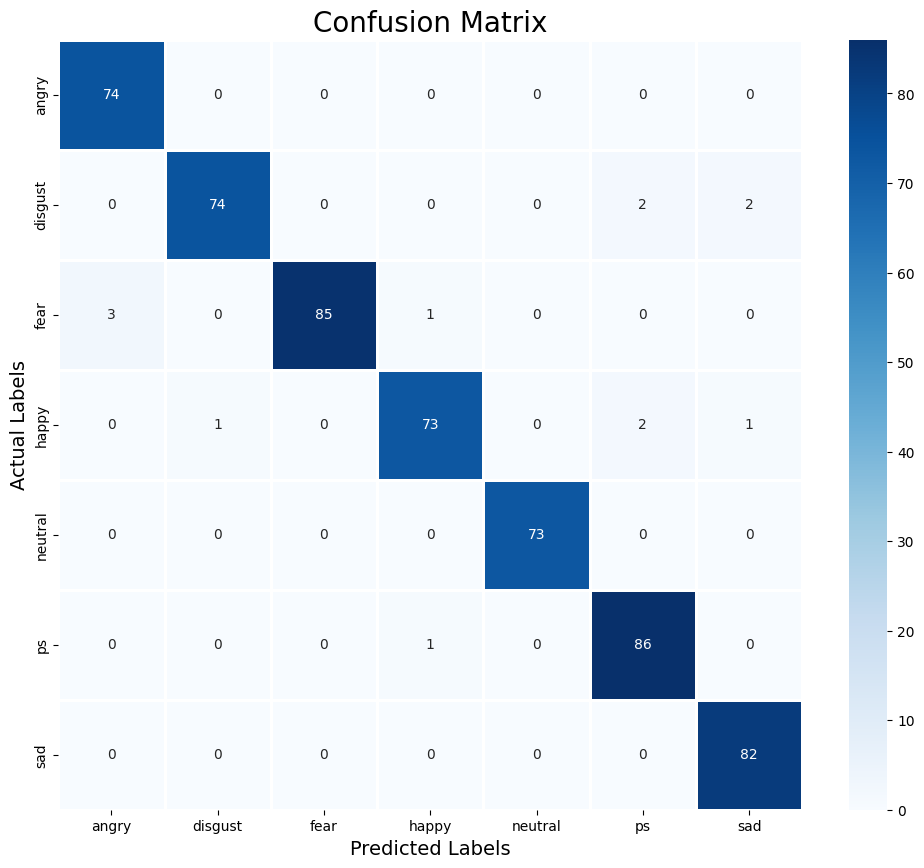

In [137]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test_class, Y_pred_class)

plt.figure(figsize=(12, 10))
cm = pd.DataFrame(cm, index=[i for i in lb.classes_], columns=[i for i in lb.classes_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()


### Observations:
**True Positive (TP)**: The number of samples that are correctly predicted as positive.<hr>
**True Negative (TN)**: The number of samples that are correctly predicted as negative.<hr>
**False Positive (FP)**: The number of samples that are incorrectly predicted as positive (Type I error).<hr>
**False Negative (FN)**: The number of samples that are incorrectly predicted as negative (Type II error).<hr>

In [138]:
from sklearn.metrics import confusion_matrix, classification_report


print(classification_report(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

       angry       0.96      1.00      0.98        74
     disgust       0.99      0.95      0.97        78
        fear       1.00      0.96      0.98        89
       happy       0.97      0.95      0.96        77
     neutral       1.00      1.00      1.00        73
          ps       0.96      0.99      0.97        87
         sad       0.96      1.00      0.98        82

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



### Save the Model

In [143]:
import pickle

# Save the model as a pickle file
with open('Neural_Network_Trained_Model_for_Audio_Sentiment.pkl', 'wb') as file:
    pickle.dump(model, file)

# Testing the Model

In [172]:
def get_zcr(audio, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def get_rmse(audio, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def get_mfcc(audio, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_feature = librosa.feature.mfcc(y=audio, sr=sr)
    return np.ravel(mfcc_feature.T) if flatten else mfcc_feature.T

# Load the new audio file
new_audio_path = r"C:\Users\sarah\Audio test 2-male.wav"
new_audio, sr = librosa.load(new_audio_path, sr=None)

# Extract features from the augmented audio
zcr_feature = get_zcr(new_audio)
rmse_feature = get_rmse(new_audio)
mfcc_feature = get_mfcc(new_audio, sr)


# Define the desired length of the features
#desired_length = 6248  # Adjust based on your requirements

# Reduce the shape of the features to the desired length
zcr_feature = zcr_feature[:284]
rmse_feature = rmse_feature[:284]
mfcc_feature = mfcc_feature[:5680]

# Create a DataFrame
dftest = pd.DataFrame()

# Assign features to DataFrame columns
dftest['ZCR'] = [zcr_feature]
dftest['RMSE'] = [rmse_feature]
dftest['MFCC'] = [mfcc_feature]


# Convert NumPy arrays to tensors
dftest['ZCR'] = dftest['ZCR'].apply(lambda x: torch.tensor(x))
dftest['RMSE'] = dftest['RMSE'].apply(lambda x: torch.tensor(x))
dftest['MFCC'] = dftest['MFCC'].apply(lambda x: torch.tensor(x))

# Expand tensors into individual columns
dftest = pd.concat([dftest.drop(['ZCR', 'RMSE', 'MFCC'], axis=1),
                dftest['ZCR'].apply(pd.Series).add_prefix('ZCR_'),
                dftest['RMSE'].apply(pd.Series).add_prefix('RMSE_'),
                dftest['MFCC'].apply(pd.Series).add_prefix('MFCC_')], axis=1)

# Fill NaN with 0
dftest = dftest.fillna(0)
#print(featured_df.isna().any())
#featured_df.shape


# Load the deserialized model
with open('NNtrainedmodel.pkl', 'rb') as file:
    model = pickle.load(file)

# Make predictions using the model
predictions = model.predict(dftest.values)
predictions = np.argmax(predictions, axis=-1)  # Convert predicted probabilities to class labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Print the predicted labels
print('Predicted labels:', predicted_labels)

1/1 [==============================] - 0s 105ms/step
Predicted labels: ['neutral']


In [90]:
# Load the trained model
with open('NNtrainedmodel.pkl', 'rb') as file:
    NNtrained_model = pickle.load(file)

# Make predictions using the trained model
predictions = NNtrained_model.predict(dftest.values)

# Print the predicted sentiment
print('Predicted sentiment:', predictions)

1/1 [==============================] - 0s 94ms/step
Predicted sentiment: [[0. 0. 0. 0. 1. 0. 0.]]


In [173]:
import speech_recognition as sr
from nltk.sentiment import SentimentIntensityAnalyzer
from IPython.display import Audio

def analyze_audio_sentiment(audio_file):
 
    # Load the audio data
    audio, sample_rate = librosa.load(audio_file)

    # Play the audio
    Audio(data=audio, rate=sample_rate)

        # Initialize the speech recognizer
    recognizer = sr.Recognizer()

    # Load the audio data
    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)

    # Play the audio
    display(Audio(audio_file))
    print('-------------------------------------------')
    # Convert speech to text
    transcript = recognizer.recognize_google(audio)
    print('Speech-to-Text')
    print(transcript)
    print('-------------------------------------------')
    # Perform sentiment analysis on the transcribed text
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(transcript)

    # Print the sentiment scores
    print('Sentiment/Polarity scores')
    print(sentiment_scores)
   # Specify the audio file path
audio_file = r"C:\Users\sarah\Audio test 2-male.wav"

# Call the function to analyze audio sentiment
analyze_audio_sentiment(audio_file)

-------------------------------------------
Speech-to-Text
hey John I just want to thank you for your service of yesterday it was really great I commend your spirit and you talked to the end and help me find out a lot of things that that wouldn't have been that way actually hidden in place I just wanted to give you a recommendation for your service and hoping you have a nice restaurant today thank you
-------------------------------------------
Sentiment/Polarity scores
{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.9677}


In [152]:
import pickle

# Load the pickle file
with open('NNtrainedmodel.pkl', 'rb') as file:
    data = pickle.load(file)

# Inspect the contents
data.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                399936    
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 7)                 231       
                                                                 
Total params: 402247 (1.53 MB)
Trainable params: 402247 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
